<a href="https://colab.research.google.com/github/niruthikka24/Intro-to-ML-Labs/blob/main/Lab%201/Lab_Activity_01_Feature_Engineering_%26_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot

from scipy import stats
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression

In [ ]:
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
#Computing the missing values'count in each column
df.isna().sum()

x1      7
x2      4
x3     12
x4      0
x5     17
x6      7
x7      3
x8     19
x9      2
x10     4
x11     0
x12     1
x13     0
x14     0
x15    74
y       0
dtype: int64

In [ ]:
df.shape

(3265, 16)

In [ ]:
df1 = df.drop_duplicates()
df1.shape

(2877, 16)

In [ ]:
df1x = df1.drop(columns=["y"])
df1y = df1["y"]
df1x.shape

(2877, 15)

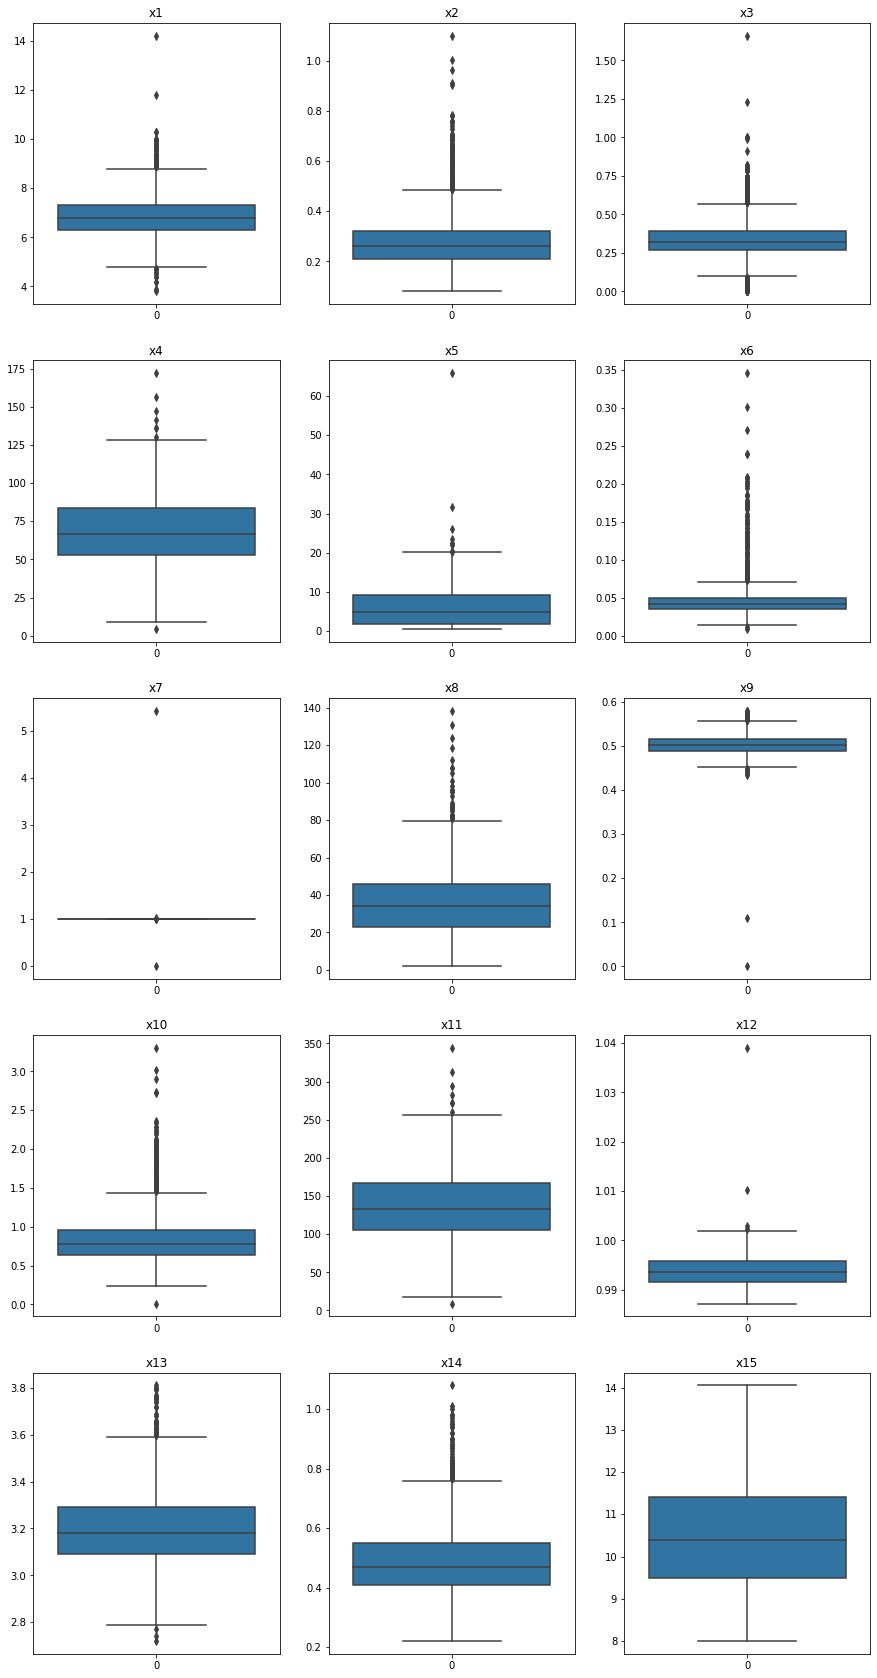

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 30))

i = 0;
for row in range(5):
  for col in range(3):
    sns.boxplot(ax=axes[row, col], data=df1x[df1x.columns[i]])
    axes[row, col].set_title(df1x.columns[i])
    i += 1

In [ ]:
df1x.isna().sum()

x1      7
x2      4
x3     12
x4      0
x5     17
x6      7
x7      3
x8     19
x9      2
x10     4
x11     0
x12     1
x13     0
x14     0
x15    74
dtype: int64

In [ ]:
mean_cols = ['x4','x5','x7','x11','x12','x15']
for col in df1x.columns:
  if col in mean_cols:
    df1x[col] = df1x[col].fillna(df1x[col].mean())
  else:
    df1x[col] = df1x[col].fillna(df1x[col].median())

df1x.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [ ]:
#replacing missing values in x1 and x15 with mean values
df1x['x1'] = df1x['x1'].fillna(df1x['x1'].mean())
df1x['x15'] = df1x['x15'].fillna(df1x['x15'].mean())

#replacing missing values with median values
cols_to_avoid = ['x1', 'x4', 'x11', 'x13', 'x14', 'x15']
for col in df1x.columns:
  if col not in cols_to_avoid:
    df1x[col] = df1x[col].fillna(df1x[col].median())

df1x.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [ ]:
df_out = pd.DataFrame(data = df1x, columns = df1x.columns)
df_out.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
df_out['y'] = df1['y']
df_out.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df_out.drop(columns = ['y'], inplace = True)
df_out.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
for col in df_out.columns:
  Q1 = df_out[col].quantile(0.25)
  Q3 = df_out[col].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  df_out[col]=np.where(df_out[col]>upper_whisker,upper_whisker,np.where(df_out[col]<lower_whisker,lower_whisker,df_out[col]))

In [ ]:
df_out['y'] = df1['y']
df_out.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df_out.to_csv('outliers_replaced_training.csv')
files.download('outliers_replaced_training.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

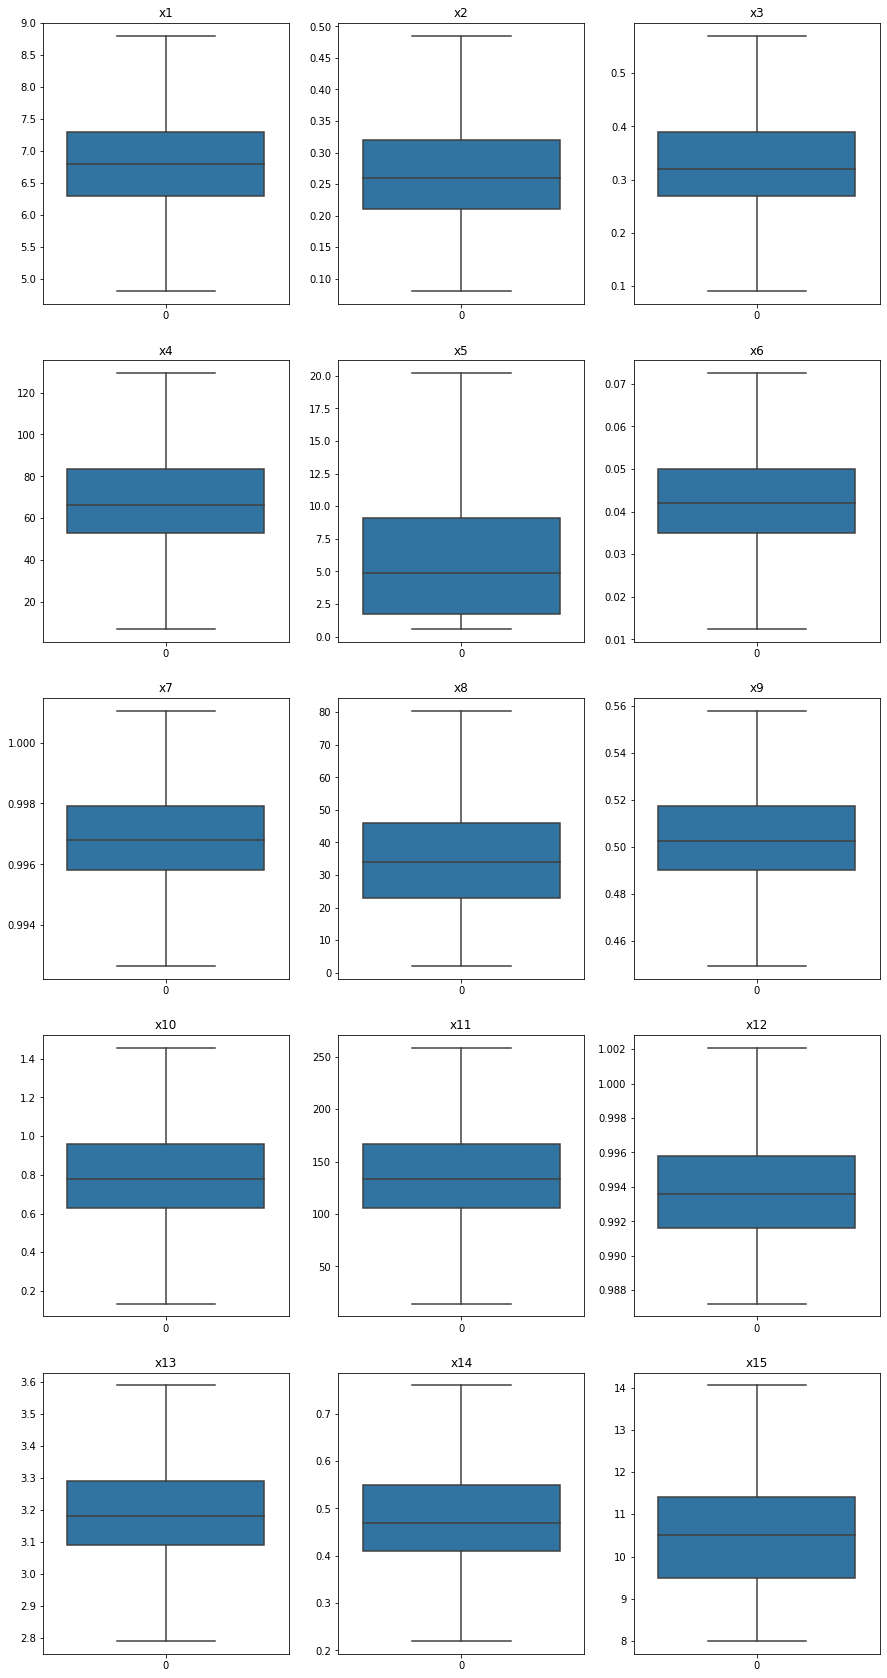

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 30))

i = 0;
for row in range(5):
  for col in range(3):
    sns.boxplot(ax=axes[row, col], data=df1x[df1x.columns[i]])
    axes[row, col].set_title(df1x.columns[i])
    i += 1

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df1x,df1y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 15) (576, 15) (2301,) (576,)


In [ ]:
lr1 = LinearRegression()
lr1.fit(xtrain,ytrain)
pred = lr1.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5186828055734862
0.3002537073930518


Feature: 0, Score: 0.11799
Feature: 1, Score: 0.96182
Feature: 2, Score: 0.13164
Feature: 3, Score: -0.00783
Feature: 4, Score: 0.08576
Feature: 5, Score: -2.48204
Feature: 6, Score: -108.93850
Feature: 7, Score: 0.00687
Feature: 8, Score: -0.03491
Feature: 9, Score: -0.93416
Feature: 10, Score: 0.00365
Feature: 11, Score: -141.03540
Feature: 12, Score: 0.93083
Feature: 13, Score: 0.62284
Feature: 14, Score: 0.13487


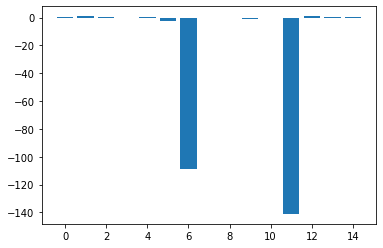

In [ ]:
importance = lr1.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

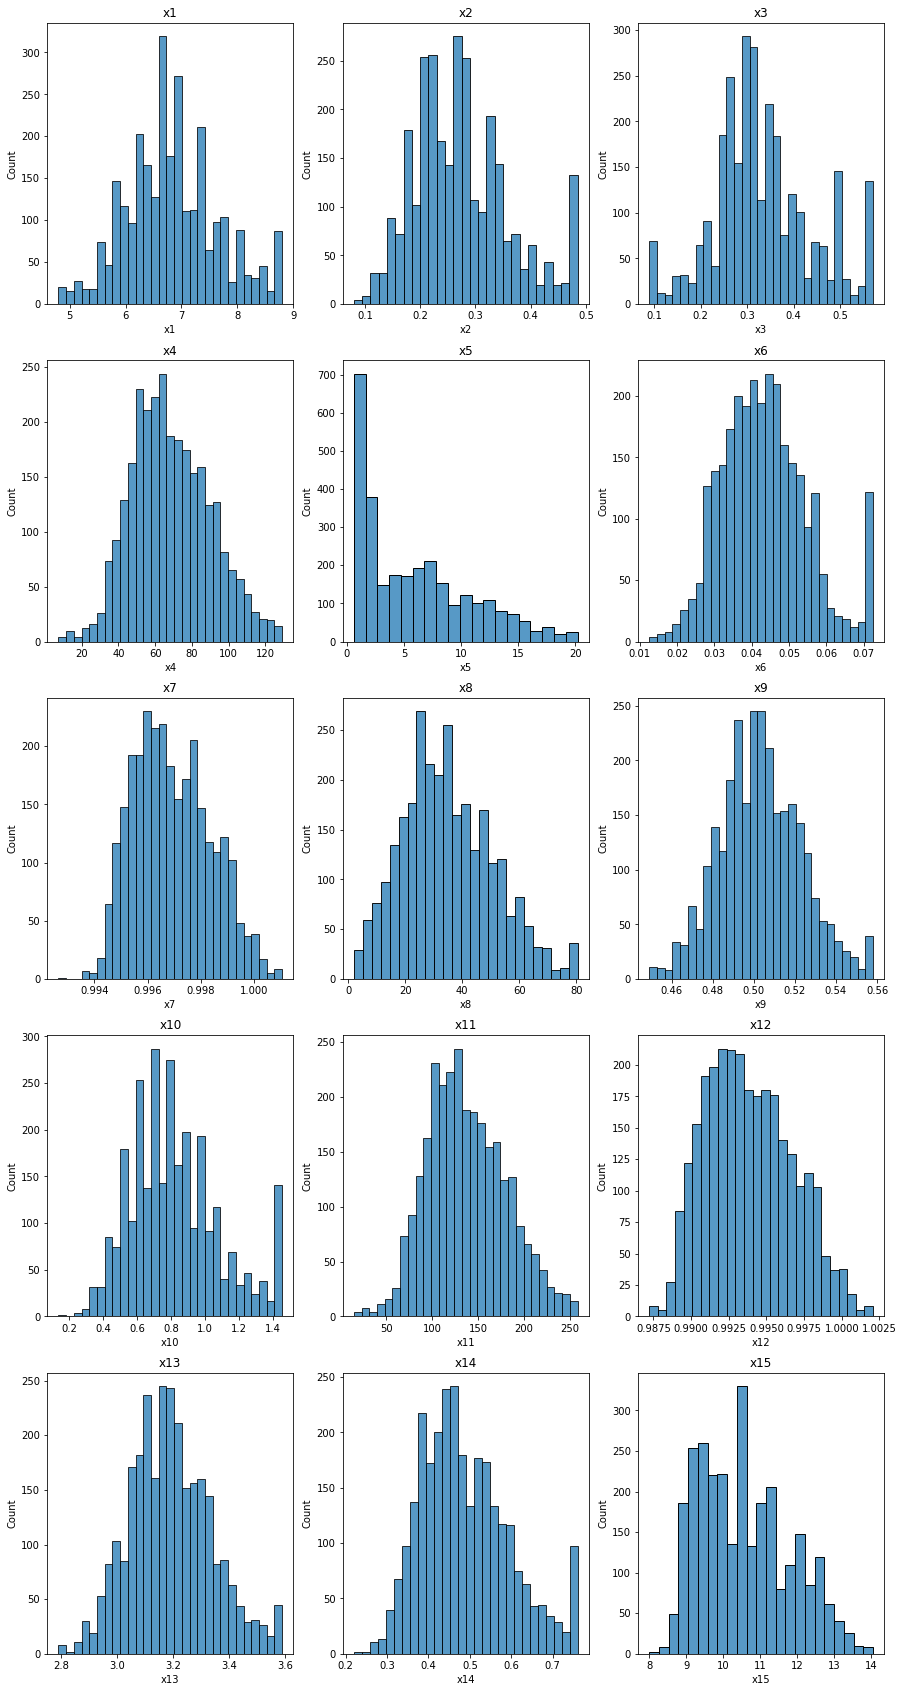

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 30))

i = 0;
for row in range(5):
  for col in range(3):
    sns.histplot(df1x[df1x.columns[i]], ax=axes[row, col])
    axes[row, col].set_title(df1x.columns[i])
    i += 1
plt.show()

In [ ]:
df1x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x5boxcox
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,1.977852
1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,0.479777
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,1.632352
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,0.543107
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,-0.104878


In [ ]:
df2 = pd.DataFrame(data = df1x, columns = ['x6','x11'])
df2['y'] = df1y

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df2,df1y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 3) (576, 3) (2301,) (576,)


In [ ]:
lr2 = LinearRegression()
lr2.fit(xtrain,ytrain)
pred = lr2.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

5.5672214925753695e-31
1.0


In [ ]:
dfstd = pd.DataFrame(data = df1x, columns = df1x.columns)
dfstd.drop(columns=["x5boxcox"], inplace = True)
dfstd.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
scaler = StandardScaler()
# transform data
dfstd = pd.DataFrame(scaler.fit_transform(dfstd))
dfstd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.991189,0.759401,0.357189,-0.097386,0.028162,-1.078120,-1.076743,0.439395,0.418994,0.759175,-0.101101,-1.079034,0.398922,-0.735295,1.583018
1,-0.892073,1.563014,-2.309763,-1.170465,-0.929242,1.697342,-0.853195,0.064761,0.551673,1.562064,-1.178514,-0.855334,0.534543,1.673144,0.184464
2,0.817661,-0.159015,-0.309549,-1.053826,-0.304848,-1.425053,-1.045302,-0.372312,-0.256893,-0.158413,-1.061404,-1.047576,-0.279186,-1.013192,1.171679
3,0.695538,-0.847827,-0.404797,-0.867203,-0.908429,0.309611,-0.493573,-1.184019,0.617708,-0.846604,-0.874028,-0.495317,0.602354,-0.364766,0.019929
4,0.573414,-0.503421,-0.881038,-1.193793,-1.074934,-1.078120,-1.600966,-0.372312,-2.045235,-0.502508,-1.201936,-1.603330,-1.974456,-1.013192,1.336214


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfstd,df1y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 15) (576, 15) (2301,) (576,)


In [ ]:
lr2 = LinearRegression()
lr2.fit(xtrain,ytrain)
pred = lr2.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5186828055734877
0.3002537073930498


Feature: 0, Score: 0.09662
Feature: 1, Score: 0.08378
Feature: 2, Score: 0.01382
Feature: 3, Score: -0.16772
Feature: 4, Score: 0.41204
Feature: 5, Score: -0.02862
Feature: 6, Score: -0.15664
Feature: 7, Score: 0.11003
Feature: 8, Score: -0.00070
Feature: 9, Score: -0.24434
Feature: 10, Score: 0.15565
Feature: 11, Score: -0.40350
Feature: 12, Score: 0.13727
Feature: 13, Score: 0.06724
Feature: 14, Score: 0.16393


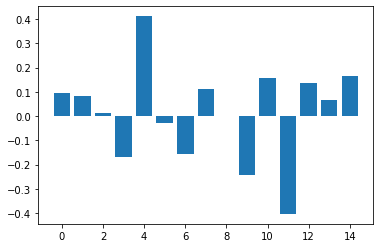

In [ ]:
importance = lr2.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
dfstd2 = pd.DataFrame(data = dfstd, columns = [3,4,6,9,10,11,14])
dfstd2.head()

,3,4,6,9,10,11,14
0,-0.097386,0.028162,-1.076743,0.759175,-0.101101,-1.079034,1.583018
1,-1.170465,-0.929242,-0.853195,1.562064,-1.178514,-0.855334,0.184464
2,-1.053826,-0.304848,-1.045302,-0.158413,-1.061404,-1.047576,1.171679
3,-0.867203,-0.908429,-0.493573,-0.846604,-0.874028,-0.495317,0.019929
4,-1.193793,-1.074934,-1.600966,-0.502508,-1.201936,-1.603330,1.336214


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfstd2,df1y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 7) (576, 7) (2301,) (576,)


In [ ]:
lr3 = LinearRegression()
lr3.fit(xtrain,ytrain)
pred = lr3.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5577123296427854
0.24759962964796556


In [ ]:
dfstd3 = pd.DataFrame(data = dfstd, columns = [4,10,11])
dfstd3.head()

,4,10,11
0,0.028162,-0.101101,-1.079034
1,-0.929242,-1.178514,-0.855334
2,-0.304848,-1.061404,-1.047576
3,-0.908429,-0.874028,-0.495317
4,-1.074934,-1.201936,-1.603330


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfstd3,df1y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 3) (576, 3) (2301,) (576,)


In [ ]:
lr4 = LinearRegression()
lr4.fit(xtrain,ytrain)
pred = lr4.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.606285761558516
0.18207002554888974


In [ ]:
dfstd4 = pd.DataFrame(data = dfstd, columns = [5,10])
dfstd4.head()

,5,10
0,-1.078120,-0.101101
1,1.697342,-1.178514
2,-1.425053,-1.061404
3,0.309611,-0.874028
4,-1.078120,-1.201936


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfstd4,df1y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 2) (576, 2) (2301,) (576,)


In [ ]:
lr5 = LinearRegression()
lr5.fit(xtrain,ytrain)
pred = lr5.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.6568048637957253
0.11391555018078314


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


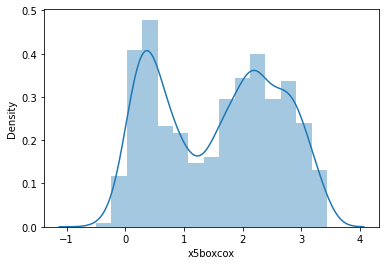

In [ ]:
df1x['x5boxcox'] = stats.boxcox(df1x['x5'])[0]
sns.distplot(df1x.x5boxcox)

In [ ]:
#replacing missing values in x1 and x15 with mean values
df1x['x1'] = df1x['x1'].fillna(df1x['x1'].mean())
df1x['x15'] = df1x['x15'].fillna(df1x['x15'].mean())

#replacing missing values with median values
cols_to_avoid = ['x1', 'x4', 'x11', 'x13', 'x14', 'x15']
for col in df1x.columns:
  if col not in cols_to_avoid:
    df1x[col] = df1x[col].fillna(df1x[col].median())

df1x.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [ ]:
df1.isnull().sum()

x1      7
x2      4
x3     12
x4      0
x5     17
x6      7
x7      3
x8     19
x9      2
x10     4
x11     0
x12     1
x13     0
x14     0
x15    74
y       0
dtype: int64

In [ ]:
z = np.abs(stats.zscore(df1x))
print(z)

[[1.88985682 0.59260137 0.26690912 ... 0.38237873 0.71230412 1.5830179 ]
 [0.85468666 1.26978803 2.70539013 ... 0.51475387 1.56177923 0.18446432]
 [0.75557803 0.18132623 0.29541777 ... 0.27949698 0.97469835 1.17167861]
 ...
 [0.39461103 0.37480814 0.77741224 ... 0.01474669 0.88723361 0.63821426]
 [0.04955431 0.01215567 0.37575018 ... 1.1399354  0.77459653 0.14460711]
 [0.1804835  1.05199479 3.23920836 ... 0.4485663  0.97469835 1.33621433]]


In [ ]:
print(np.where(z > 4))

(array([  19,   52,   57,   57,   70,   78,   78,  109,  117,  171,  199,
        266,  288,  302,  305,  332,  332,  341,  345,  358,  369,  385,
        386,  398,  409,  467,  494,  494,  497,  517,  595,  595,  595,
        595,  621,  621,  686,  761,  761,  762,  768,  814,  814,  817,
        826,  828,  834,  852,  857,  898,  978,  979, 1024, 1024, 1244,
       1309, 1350, 1431, 1431, 1434, 1509, 1514, 1536, 1547, 1553, 1553,
       1572, 1576, 1596, 1621, 1647, 1682, 1697, 1697, 1697, 1730, 1775,
       1784, 1797, 1800, 1800, 1809, 1809, 1821, 1863, 1900, 1900, 1915,
       1975, 1993, 2028, 2121, 2180, 2180, 2182, 2206, 2218, 2218, 2227,
       2273, 2282, 2439, 2521, 2563, 2565, 2571, 2611, 2637, 2646, 2670,
       2693, 2693, 2721, 2757, 2759, 2759, 2762, 2824, 2835, 2835, 2866]), array([13,  5,  1,  9,  5,  1,  9,  0,  2,  7, 13,  2,  5,  7,  8,  1,  9,
        5,  5, 13,  8,  5,  5,  5,  6,  5,  1,  9,  5,  6,  1,  4,  9, 11,
        1,  9,  5,  1,  9, 12,  7,  1,  9,  

In [ ]:
lis = list(np.where(z > 4)[0])
lis = list(set(lis))
lis

In [ ]:
df2 = pd.DataFrame(data = df1x, columns = df1x.columns)
df2['y'] = df1y
df2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df2.shape

(2877, 16)

In [ ]:
df2.iloc[lis].shape

(98, 16)

In [ ]:
df2.drop(df2.index[lis], inplace=True)
df2.shape

(2779, 16)

In [ ]:
df2.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
y      0
dtype: int64

In [ ]:
df2.to_csv('cleaned_train2.csv')
files.download('cleaned_train2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df2x = df2.drop(columns=["y"])
df2y = df2["y"]
df2x.shape

(2779, 15)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df2x,df2y,test_size = 0.2, random_state = 3)
# xtrain.head()
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 15) (556, 15) (2223,) (556,)


In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5119726679012624
0.3054713767582733


In [ ]:
xtrain.drop('x7', axis=1, inplace=True)
xtest.drop('x7', axis=1, inplace=True)
xtrain.head()

,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x12,x13,x14,x15
302,6.8,0.21,0.31,60.5,2.9,0.046,40.0,0.487138,0.63,121.0,0.99130,3.07,0.65,10.575776
1492,7.6,0.27,0.33,87.5,2.0,0.059,19.0,0.507856,0.81,175.0,0.99440,3.22,0.56,9.900000
938,6.8,0.27,0.30,80.0,13.0,0.047,69.0,0.499687,0.81,160.0,0.99705,3.16,0.50,9.600000
2315,7.4,0.28,0.36,52.5,1.1,0.028,42.0,0.475671,0.84,105.0,0.98930,2.99,0.39,12.400000
1223,6.1,0.27,0.31,68.5,3.9,0.034,42.0,0.510545,0.81,137.0,0.99218,3.24,0.46,10.900000


In [ ]:
lr1 = LinearRegression()
lr1.fit(xtrain,ytrain)
pred = lr1.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.511312052903587
0.3063675496471683


In [ ]:
df2x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
uploaded = files.upload()

Saving cleaned_train2.csv to cleaned_train2.csv


In [ ]:
df2 = pd.read_csv('cleaned_train2.csv')
df2.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df2.drop(columns=["Unnamed: 0"], inplace = True)
df2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df2.isnull().sum()

In [ ]:
df3 = pd.DataFrame(data = df2, columns = ['x6','x11'])
df3.head()

,x6,x11
0,0.031,133.0
1,0.063,87.0
2,0.027,92.0
3,0.047,100.0
4,0.031,86.0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df3,df2.y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 2) (556, 2) (2223,) (556,)


In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.658960954996962
0.10607094179418619


In [ ]:
# Remove Constant Features
constant_features = [(feat, df2[feat].std()) for feat in df2.columns]
constant_features

[('x1', 0.8499065182596766),
 ('x2', 0.09488673718140314),
 ('x3', 0.115364621579621),
 ('x4', 21.365288162797057),
 ('x5', 4.811750959233831),
 ('x6', 0.013324777350496447),
 ('x7', 0.0014394565170695421),
 ('x8', 15.894113369942062),
 ('x9', 0.02025205643929036),
 ('x10', 0.28500517621357613),
 ('x11', 42.55232006698759),
 ('x12', 0.0028725605552391677),
 ('x13', 0.14996395485325098),
 ('x14', 0.11050116271899461),
 ('x15', 1.2147097964838074),
 ('y', 0.885802478007845)]

In [ ]:
df4 = pd.DataFrame(data = df2, columns = ['x1','x3','x4','x5','x8','x10','x11','x13','x14','x15'])
df4.head()

,x1,x3,x4,x5,x8,x10,x11,x13,x14,x15
0,5.2,0.37,66.5,6.2,42.0,1.02,133.0,3.25,0.41,12.5
1,6.1,0.00,43.5,1.6,36.0,1.23,87.0,3.27,0.67,10.8
2,7.5,0.30,46.0,4.6,29.0,0.78,92.0,3.15,0.38,12.0
3,7.4,0.29,50.0,1.7,16.0,0.60,100.0,3.28,0.45,10.6
4,7.3,0.24,43.0,0.9,29.0,0.69,86.0,2.90,0.38,12.2


In [ ]:
df2y = pd.DataFrame(data = df2, columns = ['y'])
df2y.head()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df4,df2y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 10) (556, 10) (2223, 1) (556, 1)


In [ ]:
lr1 = LinearRegression()
lr1.fit(xtrain,ytrain)
pred = lr1.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5217633552041326
0.29218958849225574


In [ ]:
dfout = pd.DataFrame(data = df_out, columns = ['x1','x3','x4','x5','x8','x10','x11','x13','x14','x15'])
dfout.head()

,x1,x3,x4,x5,x8,x10,x11,x13,x14,x15
0,5.2,0.37,66.5,6.2,42.0,1.02,133.0,3.25,0.41,12.5
1,6.1,0.09,43.5,1.6,36.0,1.23,87.0,3.27,0.67,10.8
2,7.5,0.30,46.0,4.6,29.0,0.78,92.0,3.15,0.38,12.0
3,7.4,0.29,50.0,1.7,16.0,0.60,100.0,3.28,0.45,10.6
4,7.3,0.24,43.0,0.9,29.0,0.69,86.0,2.90,0.38,12.2


In [ ]:
dfouty = pd.DataFrame(data = df_out, columns = ['y'])
dfouty.head()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfout,dfouty,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 10) (576, 10) (2301, 1) (576, 1)


In [ ]:
lrout = LinearRegression()
lrout.fit(xtrain,ytrain)
pred = lrout.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5320480630039928
0.2822228622672065


In [ ]:
dfout1 = pd.DataFrame(data = df_out, columns = ['x6','x11'])
dfout1.head()

,x6,x11
0,0.031,133.0
1,0.063,87.0
2,0.027,92.0
3,0.047,100.0
4,0.031,86.0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfout1,dfouty,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 2) (576, 2) (2301, 1) (576, 1)


In [ ]:
lrout1 = LinearRegression()
lrout1.fit(xtrain,ytrain)
pred = lrout1.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.6568048637957253
0.11391555018078314


In [ ]:
sel= VarianceThreshold(threshold=0.18)
sel.fit(df_out)
mask = sel.get_support()
mask

array([ True, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False,  True,  True])

In [ ]:
reduced_df = df_out.loc[:, mask]
reduced_df.head()

,x1,x4,x5,x8,x11,x15,y
0,5.2,66.5,6.2,42.0,133.0,12.5,6
1,6.1,43.5,1.6,36.0,87.0,10.8,6
2,7.5,46.0,4.6,29.0,92.0,12.0,7
3,7.4,50.0,1.7,16.0,100.0,10.6,6
4,7.3,43.0,0.9,29.0,86.0,12.2,6


In [ ]:
reduced_df.drop(columns=['y'], inplace = True)
reduced_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,x1,x4,x5,x8,x11,x15
0,5.2,66.5,6.2,42.0,133.0,12.5
1,6.1,43.5,1.6,36.0,87.0,10.8
2,7.5,46.0,4.6,29.0,92.0,12.0
3,7.4,50.0,1.7,16.0,100.0,10.6
4,7.3,43.0,0.9,29.0,86.0,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(reduced_df,dfouty,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 6) (576, 6) (2301, 1) (576, 1)


In [ ]:
lrout2 = LinearRegression()
lrout2.fit(xtrain,ytrain)
pred = lrout2.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5596743648308837
0.24495268081125177


In [ ]:
df5 = pd.DataFrame(data = df2, columns = ['x1','x4','x5','x8','x11','x15'])
df5.head()

,x1,x4,x5,x8,x11,x15
0,5.2,66.5,6.2,42.0,133.0,12.5
1,6.1,43.5,1.6,36.0,87.0,10.8
2,7.5,46.0,4.6,29.0,92.0,12.0
3,7.4,50.0,1.7,16.0,100.0,10.6
4,7.3,43.0,0.9,29.0,86.0,12.2


In [ ]:
df2y.shape

(2779, 1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df5,df2y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 6) (556, 6) (2223, 1) (556, 1)


In [ ]:
lr3 = LinearRegression()
lr3.fit(xtrain,ytrain)
pred = lr3.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5378234409622313
0.2704028995730192


In [ ]:
df2.shape

(2779, 16)

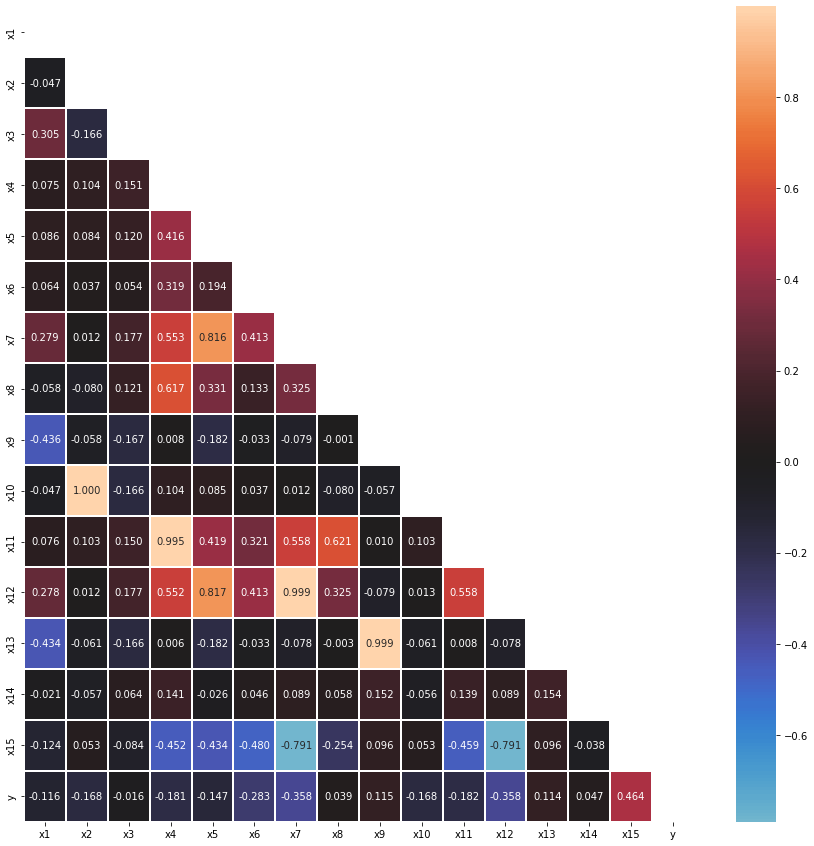

In [ ]:
corr=df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [ ]:
df6 = pd.DataFrame(data = df2, columns = ['x1','x2','x3','x4','x5','x6','x8','x9','x14','x15'])
df6.head()

,x1,x2,x3,x4,x5,x6,x8,x9,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,42.0,0.511883,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,36.0,0.514548,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,29.0,0.498311,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,16.0,0.515874,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,29.0,0.462398,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df6,df2y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 10) (556, 10) (2223, 1) (556, 1)


In [ ]:
lr4 = LinearRegression()
lr4.fit(xtrain,ytrain)
pred = lr4.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.51931421796335
0.2955120235022022


In [ ]:
df7 = pd.DataFrame(data = df2, columns = ['x1','x2','x4','x5','x6','x9','x15'])
df7.head()

,x1,x2,x4,x5,x6,x9,x15
0,5.2,0.34,66.5,6.2,0.031,0.511883,12.5
1,6.1,0.41,43.5,1.6,0.063,0.514548,10.8
2,7.5,0.26,46.0,4.6,0.027,0.498311,12.0
3,7.4,0.20,50.0,1.7,0.047,0.515874,10.6
4,7.3,0.23,43.0,0.9,0.031,0.462398,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df7,df2y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 7) (556, 7) (2223, 1) (556, 1)


In [ ]:
lr5 = LinearRegression()
lr5.fit(xtrain,ytrain)
pred = lr5.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5327045157712682
0.27734709852787975


In [ ]:
dfnew = df2.copy()
dfnew['x5log'] = np.log(df2['x5'])
dfnew['x6log'] = np.log(df2['x6'])
dfnew['x8inverse'] = np.reciprocal(df2['x8'])
dfnew.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y,x5log,x6log,x8inverse
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6,1.824549,-3.473768,0.023810
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6,0.470004,-2.764621,0.027778
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7,1.526056,-3.611918,0.034483
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6,0.530628,-3.057608,0.062500
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6,-0.105361,-3.473768,0.034483


In [ ]:
dfnew1 = pd.DataFrame(data = dfnew, columns = ['x5log','x6log','x8inverse','x10','x14','x15'])
dfnew1.head()

,x5log,x6log,x8inverse,x10,x14,x15
0,1.824549,-3.473768,0.023810,1.02,0.41,12.5
1,0.470004,-2.764621,0.027778,1.23,0.67,10.8
2,1.526056,-3.611918,0.034483,0.78,0.38,12.0
3,0.530628,-3.057608,0.062500,0.60,0.45,10.6
4,-0.105361,-3.473768,0.034483,0.69,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfnew1,df2y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 6) (556, 6) (2223, 1) (556, 1)


In [ ]:
lr6 = LinearRegression()
lr6.fit(xtrain,ytrain)
pred = lr6.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.49860540194576103
0.32360505732883627


In [ ]:
dfnew2 = pd.DataFrame(data = dfnew, columns = ['x5log','x6log','x8inverse','x10','x12','x14','x15'])
dfnew2.head()

,x5log,x6log,x8inverse,x10,x12,x14,x15
0,1.824549,-3.473768,0.023810,1.02,0.99076,0.41,12.5
1,0.470004,-2.764621,0.027778,1.23,0.99140,0.67,10.8
2,1.526056,-3.611918,0.034483,0.78,0.99085,0.38,12.0
3,0.530628,-3.057608,0.062500,0.60,0.99243,0.45,10.6
4,-0.105361,-3.473768,0.034483,0.69,0.98926,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfnew2,df2y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 7) (556, 7) (2223, 1) (556, 1)


In [ ]:
lr7 = LinearRegression()
lr7.fit(xtrain,ytrain)
pred = lr7.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.48695982838032514
0.33940313539503153


In [ ]:
dfnew3 = pd.DataFrame(data = dfnew, columns = ['x5log','x6log','x7','x8inverse','x10','x12','x14','x15'])
dfnew3.head()

,x5log,x6log,x7,x8inverse,x10,x12,x14,x15
0,1.824549,-3.473768,0.995369,0.023810,1.02,0.99076,0.41,12.5
1,0.470004,-2.764621,0.995691,0.027778,1.23,0.99140,0.67,10.8
2,1.526056,-3.611918,0.995414,0.034483,0.78,0.99085,0.38,12.0
3,0.530628,-3.057608,0.996208,0.062500,0.60,0.99243,0.45,10.6
4,-0.105361,-3.473768,0.994616,0.034483,0.69,0.98926,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfnew3,df2y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 8) (556, 8) (2223, 1) (556, 1)


In [ ]:
lr8 = LinearRegression()
lr8.fit(xtrain,ytrain)
pred = lr8.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.48746155561465043
0.33872250545686067


In [ ]:
df2x = df2.drop(columns=["y"])
df2y = df2['y']
df2x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

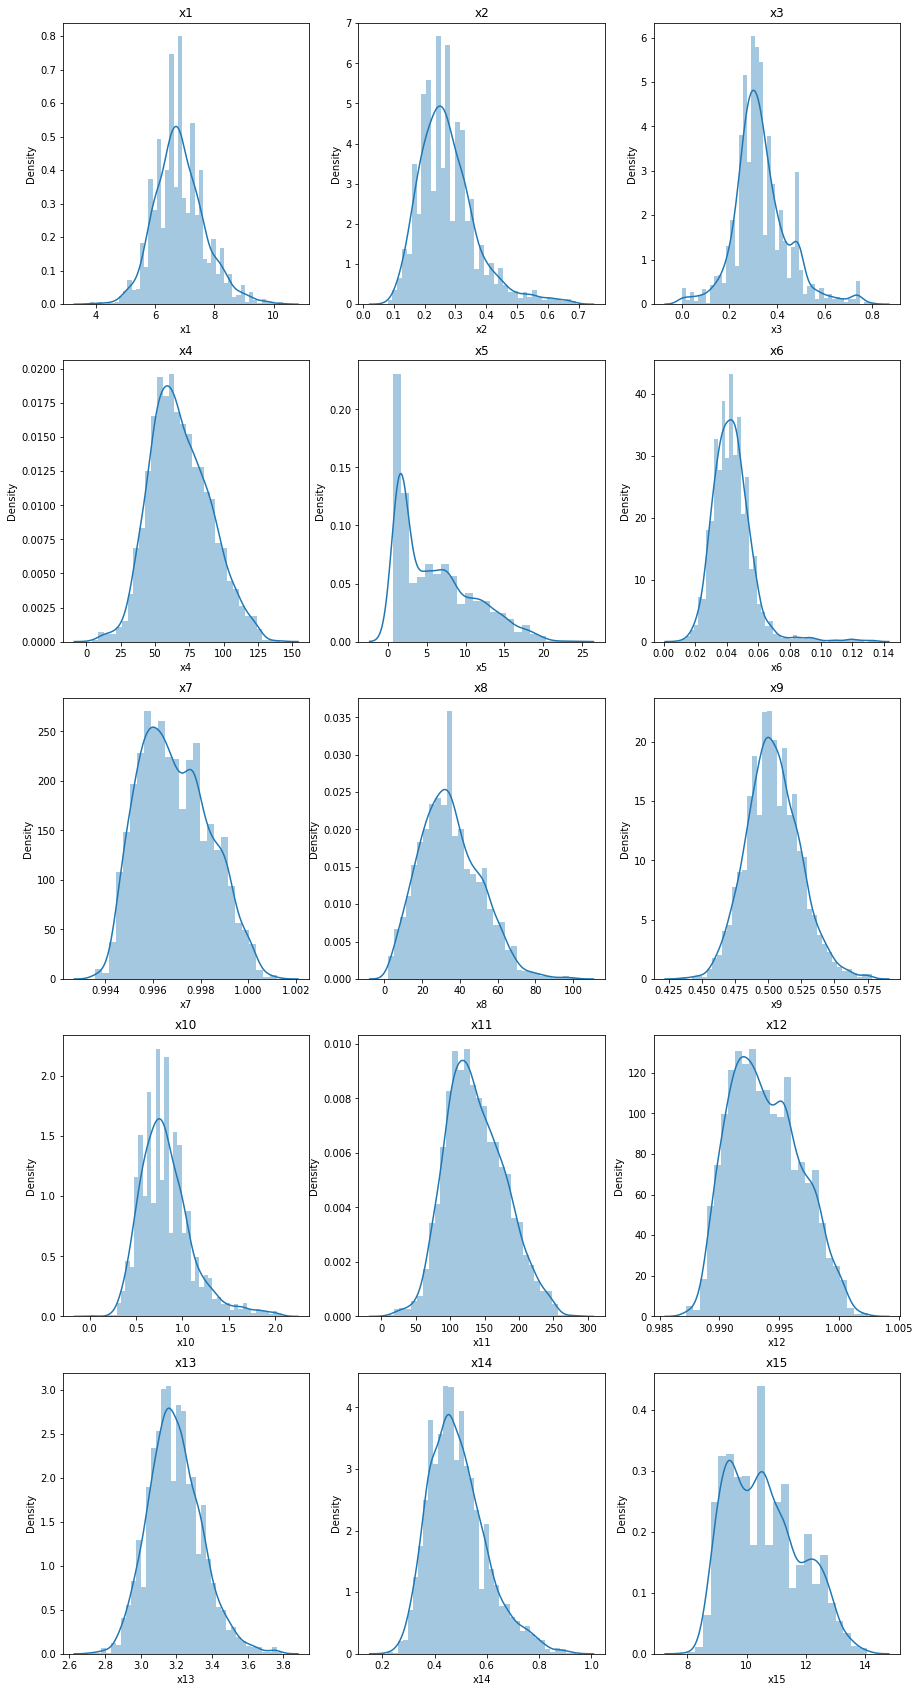

In [ ]:
# fig, axes = plt.subplots(ncols=4, nrows=3)

# for i, ax in zip(range(10), axes.flat):
#     sns.distplot(data[i,0,0,0], hist=False, ax=ax)
# plt.show()


fig, axes = plt.subplots(5, 3, figsize=(15, 30))

i = 0;
for row in range(5):
  for col in range(3):
    sns.distplot(df2x[df2x.columns[i]], ax=axes[row, col])
    axes[row, col].set_title(df2x.columns[i])
    i += 1
plt.show()


In [ ]:
#x5 and x6 seem to be the most postively skewed columns
#trying sqrt transformation
df3x = df2x.copy()
df3y = df2y.copy()
print(df3x.shape)
print(df3y.shape)
df3x.head()

(2779, 15)
(2779,)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
df3x['x5log'] = np.log(df3x['x5'])
sns.distplot(df3x.x5log)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


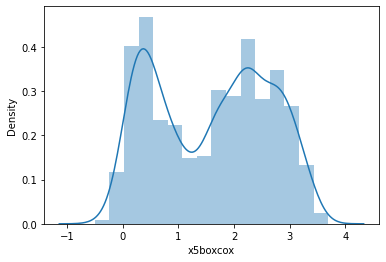

In [ ]:
df3x['x5boxcox'] = stats.boxcox(df3x['x5'])[0]
sns.distplot(df3x.x5boxcox)

In [ ]:
df3x['x5inverse'] = np.reciprocal(df3x['x5'])
sns.distplot(df3x.x5inverse)

In [ ]:
df3x['x5sqrt'] = np.sqrt(df3x['x5'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

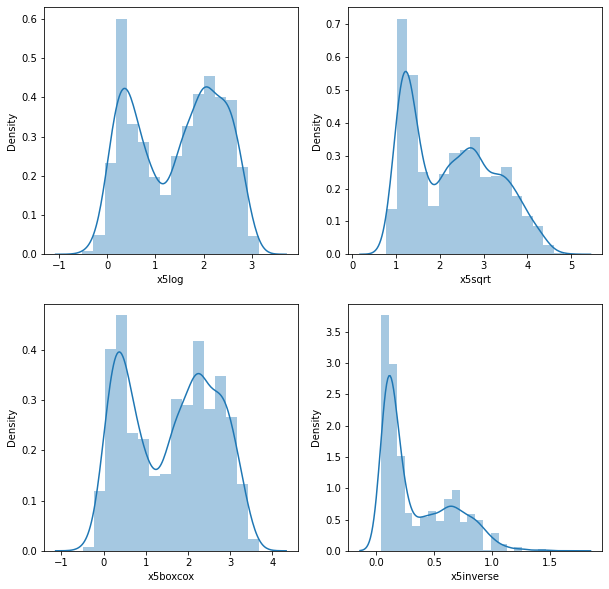

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.distplot(df3x['x5log'], ax=axes[0,0])
sns.distplot(df3x['x5sqrt'], ax=axes[0,1])
sns.distplot(df3x['x5boxcox'], ax=axes[1,0])
sns.distplot(df3x['x5inverse'], ax=axes[1,1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

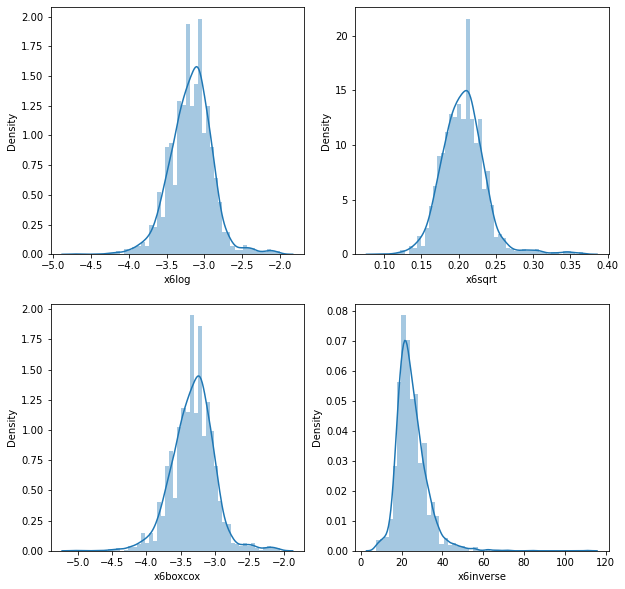

In [ ]:
df3x['x6log'] = np.log(df3x['x6'])
df3x['x6boxcox'] = stats.boxcox(df3x['x6'])[0]
df3x['x6inverse'] = np.reciprocal(df3x['x6'])
df3x['x6sqrt'] = np.sqrt(df3x['x6'])

fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.distplot(df3x['x6log'], ax=axes[0,0])
sns.distplot(df3x['x6sqrt'], ax=axes[0,1])
sns.distplot(df3x['x6boxcox'], ax=axes[1,0])
sns.distplot(df3x['x6inverse'], ax=axes[1,1])

In [ ]:
df4x = pd.DataFrame(data = df3x, columns = ['x1','x2','x3','x4','x5boxcox','x6log','x7','x8','x9','x10','x11','x12','x13','x14','x15'])
df4x.head()

,x1,x2,x3,x4,x5boxcox,x6log,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,1.994492,-3.473768,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,0.480793,-2.764621,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,1.643780,-3.611918,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,0.544407,-3.057608,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,-0.104828,-3.473768,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df4x,df3y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 15) (556, 15) (2223,) (556,)


In [ ]:
lr2 = LinearRegression()
lr2.fit(xtrain,ytrain)
pred = lr2.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5034995858236305
0.31696573651406945


In [ ]:
df5x = pd.DataFrame(data = df3x, columns = ['x1','x2','x3','x4','x5log','x6log','x7','x8','x9','x10','x11','x12','x13','x14','x15'])
df5x.head()

,x1,x2,x3,x4,x5log,x6log,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,1.824549,-3.473768,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,0.470004,-2.764621,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,1.526056,-3.611918,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,0.530628,-3.057608,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,-0.105361,-3.473768,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df5x,df3y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 15) (556, 15) (2223,) (556,)


In [ ]:
lr3 = LinearRegression()
lr3.fit(xtrain,ytrain)
pred = lr3.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5037392314588417
0.31664063956354005


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


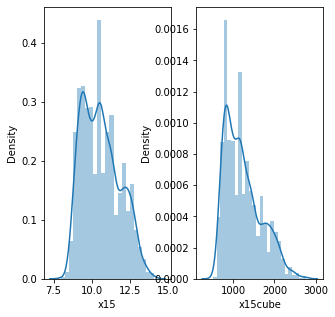

In [ ]:
df3x['x15cube'] = np.power(df3x['x15'], 3)
fig, axes = plt.subplots(1, 2, figsize=(5,5))
sns.distplot(df3x['x15'], ax=axes[0])
sns.distplot(df3x['x15cube'], ax=axes[1])

In [ ]:
df3x['x1inverse'] = np.reciprocal(df3x['x1'])
df3x['x2inverse'] = np.reciprocal(df3x['x2'])
df3x['x4inverse'] = np.reciprocal(df3x['x4'])
df3x['x8inverse'] = np.reciprocal(df3x['x8'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

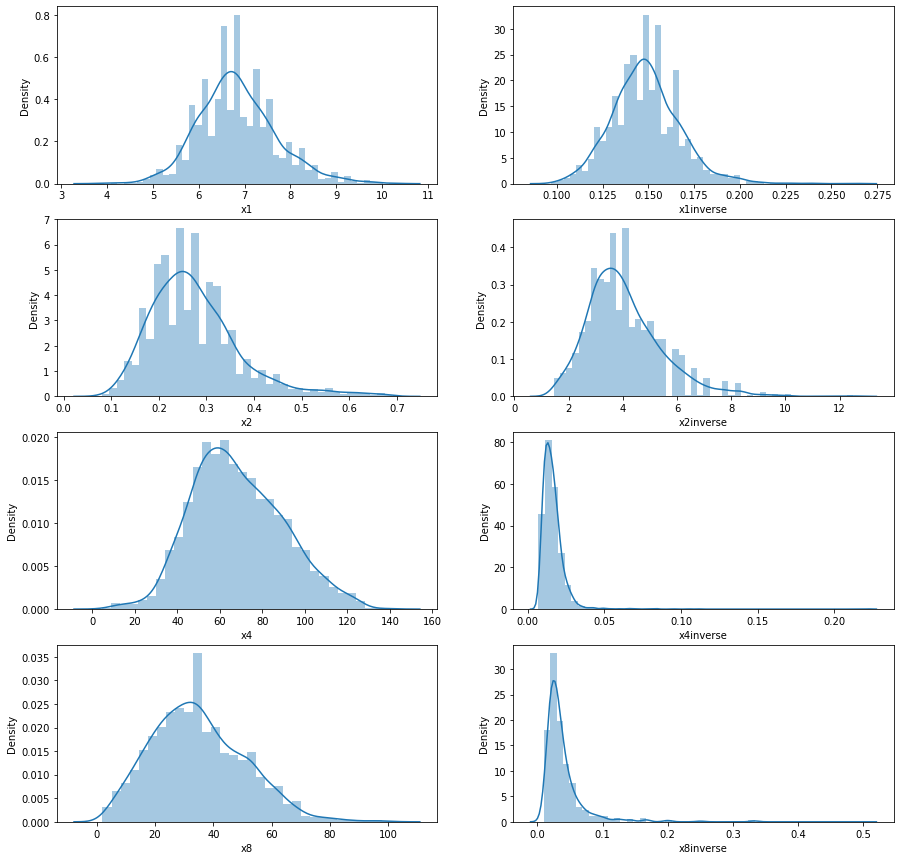

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))

sns.distplot(df3x['x1'], ax=axes[0,0])
sns.distplot(df3x['x1inverse'], ax=axes[0,1])
sns.distplot(df3x['x2'], ax=axes[1,0])
sns.distplot(df3x['x2inverse'], ax=axes[1,1])
sns.distplot(df3x['x4'], ax=axes[2,0])
sns.distplot(df3x['x4inverse'], ax=axes[2,1])
sns.distplot(df3x['x8'], ax=axes[3,0])
sns.distplot(df3x['x8inverse'], ax=axes[3,1])

In [ ]:
# sns.lmplot(x="x", y="y", data=df3, order=1)
df2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df3x['x6inverse'] = np.reciprocal(df3x['x6'])

In [ ]:
df3 = pd.DataFrame(data = df3x, columns = df3x.columns)
df3['y'] = df3y
df3.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x5boxcox,x6inverse,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,1.994492,32.258065,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,0.480793,15.873016,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,1.643780,37.037037,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,0.544407,21.276596,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,-0.104828,32.258065,6


In [ ]:
df3['x6log'] = np.log(df3['x6'])

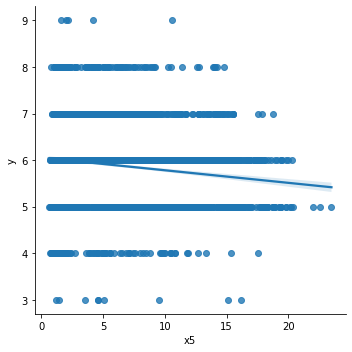

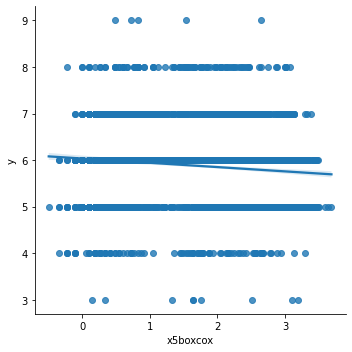

In [ ]:
sns.lmplot(x="x5", y="y", data=df3, order=1)
sns.lmplot(x="x5boxcox", y="y", data=df3, order=1)
# sns.lmplot(x=df3.x6, y="y", data=df3, order=1)
# sns.lmplot(x=df3.x6log, y="y", data=df3, order=1)

In [ ]:
df4x = pd.DataFrame(data = df3, columns = ['x1','x2','x3','x4','x5boxcox','x6log','x7','x8','x9','x10','x11','x12','x13','x14','x15'])
df4x.head()

,x1,x2,x3,x4,x5boxcox,x6log,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,1.994492,-3.473768,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,0.480793,-2.764621,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,1.643780,-3.611918,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,0.544407,-3.057608,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,-0.104828,-3.473768,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df4x,df3.y,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 15) (556, 15) (2223,) (556,)


In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5034995858236305
0.31696573651406945


Feature: 0, Score: 0.07772
Feature: 1, Score: 1.54097
Feature: 2, Score: 0.13229
Feature: 3, Score: -0.00119
Feature: 4, Score: 0.27179
Feature: 5, Score: -0.15825
Feature: 6, Score: -298.16303
Feature: 7, Score: 0.00823
Feature: 8, Score: 13.41901
Feature: 9, Score: -1.08540
Feature: 10, Score: -0.00025
Feature: 11, Score: 20.91663
Feature: 12, Score: -1.08750
Feature: 13, Score: 0.70912
Feature: 14, Score: 0.18842


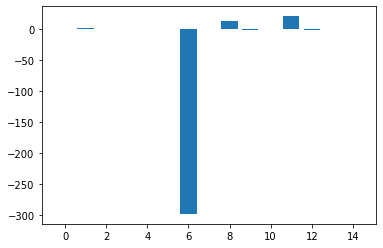

In [ ]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

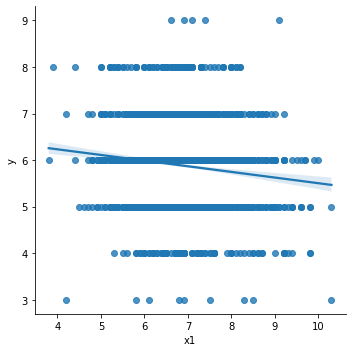

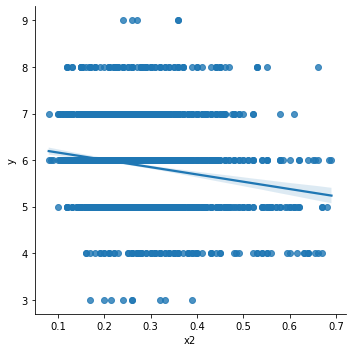

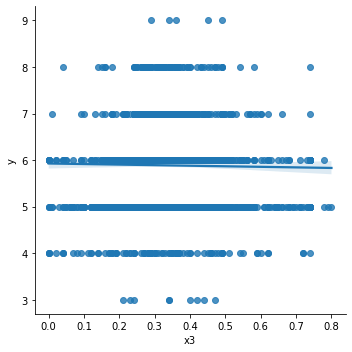

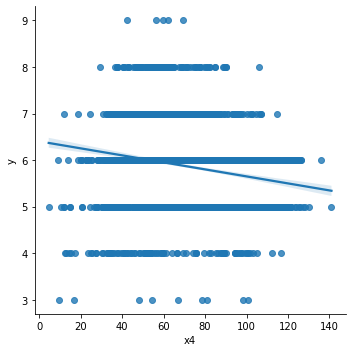

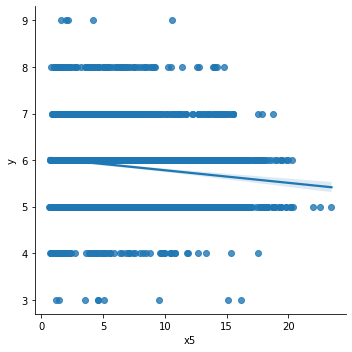

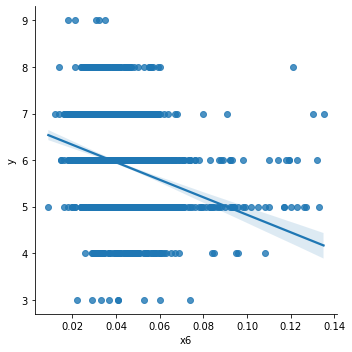

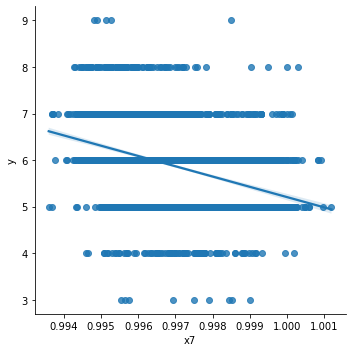

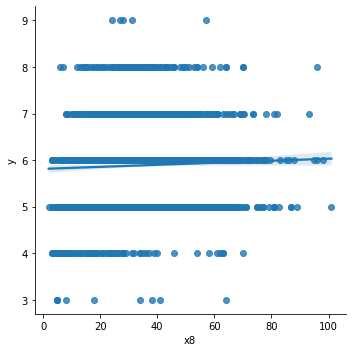

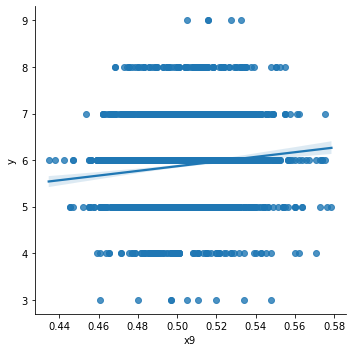

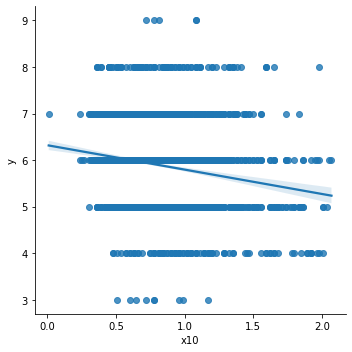

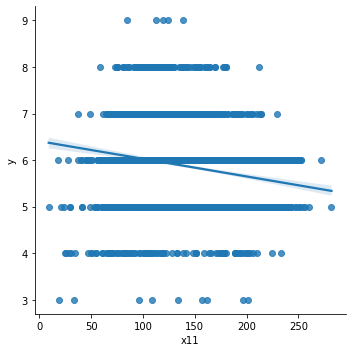

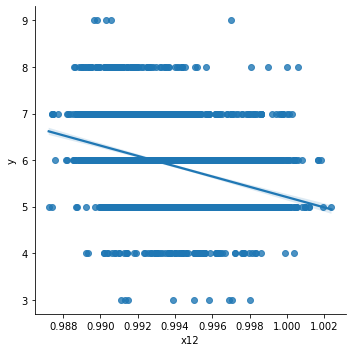

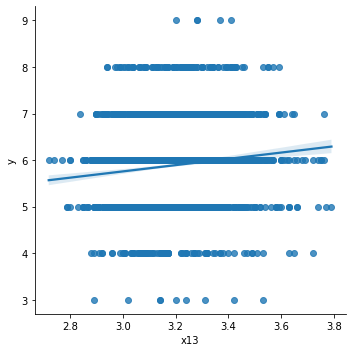

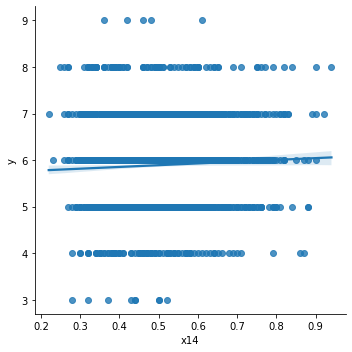

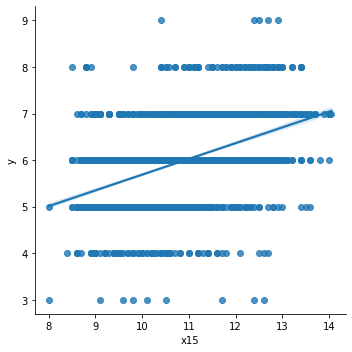

In [ ]:
# sns.lmplot(x="x1", y="y", data=df2, order=1)

# fig, axes = plt.subplots(5, 3, figsize=(15, 30))

i = 0;
for row in range(5):
  for col in range(3):
    sns.lmplot(x=df2x.columns[i], y="y", data=df2, order=1)
    # sns.distplot(df2x[df2x.columns[i]], ax=axes[row, col])
    # axes[row, col].set_title(df2x.columns[i])
    i += 1
plt.show()